In [1]:
import collections
import pathlib
import numpy as np
import pandas as pd
from IPython.core.display import display

# viz
import matplotlib.pyplot as plt
from matplotlib import cm # colormap
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')
plt.style.use('ggplot')


# bayesian inference library
import tensorflow as tf
import edward as ed
import tensorflow.contrib.distributions as ds
from edward.models import Normal, MultivariateNormalFullCovariance, MultivariateNormalTriL, PointMass, Empirical, Gamma
from tensorflow.contrib.distributions import bijectors
from edward.util import rbf

In [2]:
sess = ed.get_session()

x = Gamma(1.0, 2.0)

In [4]:
qx = Normal(loc=tf.Variable(tf.random_normal([])),
           scale = tf.nn.softplus(tf.Variable(tf.random_normal([]))))

inference = ed.KLqp({x:qx})
inference.run()

1000/1000 [100%] ██████████████████████████████ Elapsed: 2s | Loss: -0.025


In [5]:
x_unconstrained= inference.transformations[x] # 変換された事前分布

In [6]:
x_unconstrained

<ed.RandomVariable 'TransformedDistribution/' shape=() dtype=float32>

In [10]:
sess.run(x_unconstrained)

0.1500479

In [11]:
x_transform = x_unconstrained.bijector # 変換された事前分布の変換

In [12]:
qx_constrained = ed.transform(qx, bijectors.Invert(x_transform)) # 逆変換された正規分布に従って分布するランダム変数

In [13]:
sess.run(qx_constrained)

0.26909363

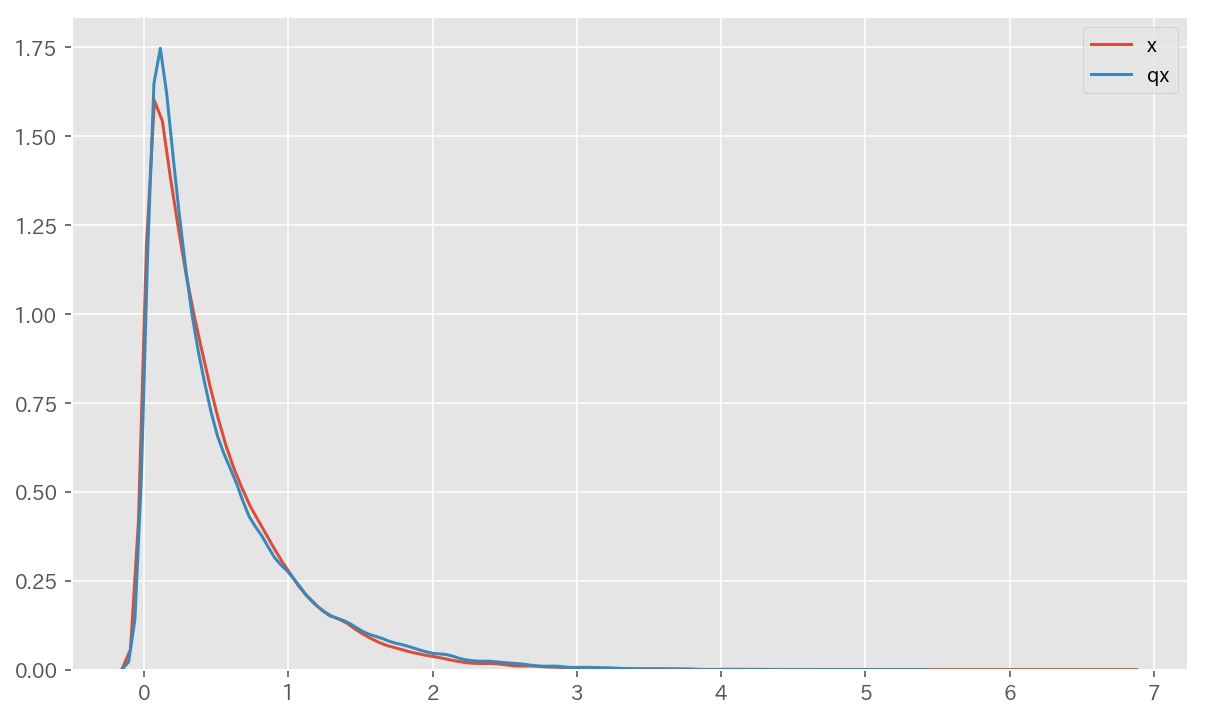

In [14]:
plt.figure(figsize=(10, 6))
sns.distplot(x.sample(50000).eval(), hist=False, label='x')
sns.distplot(qx_constrained.sample(50000).eval(), hist=False, label='qx')
plt.show()